# This is a kaggle notebook and only meant to run on kaggle
# DataSet link: https://www.kaggle.com/datasets/gpiosenka/100-bird-species

In [217]:
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D,Dropout, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [218]:
import os
# Define the root directory path
train_root_dir = '/kaggle/input/100-bird-species/train'

test_root_dir = "/kaggle/input/100-bird-species/test"

valid_root_dir = "/kaggle/input/100-bird-species/valid"

In [219]:
def setData(root_dir):
    i_dir = 1
    X, y = [], []
# Loop over each directory in 'root_dir'
    for directory in sorted(os.listdir(root_dir))[:20]:
        dir_path = os.path.join(root_dir, directory)
        print(f"bird: {i_dir} / 20",directory)
        i_dir+=1
        # Check if the path corresponds to a directory
        if os.path.isdir(dir_path):
             # Loop over each file in the directory
            for file_name in os.listdir(dir_path):
                # Create the full path to the image
                image_path = os.path.join(dir_path, file_name)
                # Read the image using OpenCV
                image = cv2.imread(image_path)
                # Resize the image to (224, 224)
                image = cv2.resize(image, (224, 224))
                # Normalize the pixel values to be in the range [0, 1]
                image = image / 225
                # Append the image to the X list
                X.append(image)
                 # Append the corresponding label (directory name) to the y list
                y.append(directory)
    return X,y

In [220]:
import cv2
x_train,y_train = setData(train_root_dir)
x_test,y_test = setData(test_root_dir)
x_valid,y_valid = setData(valid_root_dir)

bird: 1 / 20 ABBOTTS BABBLER
bird: 2 / 20 ABBOTTS BOOBY
bird: 3 / 20 ABYSSINIAN GROUND HORNBILL
bird: 4 / 20 AFRICAN CROWNED CRANE
bird: 5 / 20 AFRICAN EMERALD CUCKOO
bird: 6 / 20 AFRICAN FIREFINCH
bird: 7 / 20 AFRICAN OYSTER CATCHER
bird: 8 / 20 AFRICAN PIED HORNBILL
bird: 9 / 20 AFRICAN PYGMY GOOSE
bird: 10 / 20 ALBATROSS
bird: 11 / 20 ALBERTS TOWHEE
bird: 12 / 20 ALEXANDRINE PARAKEET
bird: 13 / 20 ALPINE CHOUGH
bird: 14 / 20 ALTAMIRA YELLOWTHROAT
bird: 15 / 20 AMERICAN AVOCET
bird: 16 / 20 AMERICAN BITTERN
bird: 17 / 20 AMERICAN COOT
bird: 18 / 20 AMERICAN DIPPER
bird: 19 / 20 AMERICAN FLAMINGO
bird: 20 / 20 AMERICAN GOLDFINCH
bird: 1 / 20 ABBOTTS BABBLER
bird: 2 / 20 ABBOTTS BOOBY
bird: 3 / 20 ABYSSINIAN GROUND HORNBILL
bird: 4 / 20 AFRICAN CROWNED CRANE
bird: 5 / 20 AFRICAN EMERALD CUCKOO
bird: 6 / 20 AFRICAN FIREFINCH
bird: 7 / 20 AFRICAN OYSTER CATCHER
bird: 8 / 20 AFRICAN PIED HORNBILL
bird: 9 / 20 AFRICAN PYGMY GOOSE
bird: 10 / 20 ALBATROSS
bird: 11 / 20 ALBERTS TOWHEE
bird: 1

In [221]:
print('classes = ',end='')
print(sorted(os.listdir(train_root_dir)[0:20]))

classes = ['AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN WIGEON', 'AUCKLAND SHAQ', 'BLACK BREASTED PUFFBIRD', 'BLACK THROATED WARBLER', 'BLUE GROSBEAK', 'CAPE MAY WARBLER', 'CARMINE BEE-EATER', 'DALMATIAN PELICAN', 'DUSKY LORY', 'GAMBELS QUAIL', 'GURNEYS PITTA', 'PALM NUT VULTURE', 'RED TAILED HAWK', 'STRIPPED SWALLOW', 'UMBRELLA BIRD', 'VERMILION FLYCATHER', 'WATTLED CURASSOW', 'YELLOW CACIQUE']


Text(0.5, 1.0, 'AMERICAN GOLDFINCH')

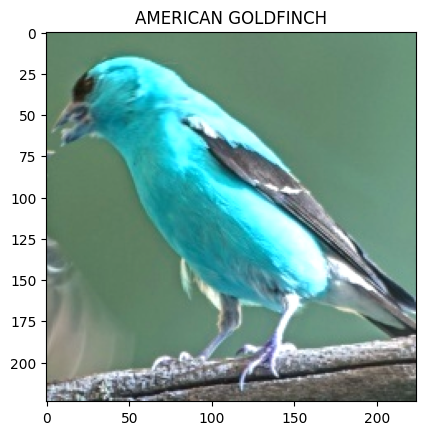

In [222]:
plt.imshow(x_train[-1])
plt.title(y_train[-1])

In [223]:
def changeToArray(x):
    return np.array(x)

In [224]:
x_train = changeToArray(x_train)
x_test = changeToArray(x_test)
x_valid = changeToArray(x_valid)

y_train = changeToArray(y_train)
y_test = changeToArray(y_test)
y_valid = changeToArray(y_valid)

In [225]:
print(x_train.shape,x_test.shape,x_valid.shape)
print(y_train.shape,y_test.shape,y_valid.shape)

(3240, 224, 224, 3) (100, 224, 224, 3) (100, 224, 224, 3)
(3240,) (100,) (100,)


In [226]:
# one-hot encoding
from sklearn.preprocessing import LabelBinarizer #used for converting categorical labels into binary vectors.

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_valid = lb.fit_transform(y_valid)

In [227]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense

# Create a Sequential model
model = Sequential([
    # Convolutional layer with 8 filters, a 3x3 kernel, and ReLU activation
    Conv2D(8, (3, 3), input_shape=(224, 224, 3), activation="relu"),
    # MaxPooling layer with a 3x3 pool size
    MaxPooling2D((3, 3)),
    
    # Convolutional layer with 16 filters, a 3x3 kernel, and ReLU activation
    Conv2D(16, (3, 3), activation="relu"),
    # MaxPooling layer with a 3x3 pool size
    MaxPooling2D((3, 3)),
    
    # Convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
    Conv2D(32, (3, 3), activation="relu"),
    # MaxPooling layer with a 3x3 pool size
    MaxPooling2D((3, 3)),
    
    # Flatten layer to convert the 3D feature maps to 1D feature vectors
    Flatten(),
    
    # Dense (fully connected) layer with 32 neurons and ReLU activation
    Dense(32, activation="relu"),
    # Output Dense layer with 20 neurons (assuming 20 bird classes) and softmax activation for classification
    Dense(20, activation="softmax")
])

# Print the model summary to check the architecture
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 74, 74, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 24, 24, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 7, 7, 32)        

In [228]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [229]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
26/26 [==============================] - 3s 57ms/step - loss: 2.9208 - accuracy: 0.1031 - val_loss: 2.7979 - val_accuracy: 0.1600
Epoch 2/20
26/26 [==============================] - 1s 46ms/step - loss: 2.6331 - accuracy: 0.2136 - val_loss: 2.4406 - val_accuracy: 0.2500
Epoch 3/20
26/26 [==============================] - 1s 46ms/step - loss: 2.2456 - accuracy: 0.3093 - val_loss: 2.1255 - val_accuracy: 0.3900
Epoch 4/20
26/26 [==============================] - 1s 47ms/step - loss: 1.9738 - accuracy: 0.3938 - val_loss: 1.9387 - val_accuracy: 0.4000
Epoch 5/20
26/26 [==============================] - 1s 45ms/step - loss: 1.7718 - accuracy: 0.4611 - val_loss: 1.7946 - val_accuracy: 0.4200
Epoch 6/20
26/26 [==============================] - 1s 47ms/step - loss: 1.5902 - accuracy: 0.5145 - val_loss: 1.6611 - val_accuracy: 0.4500
Epoch 7/20
26/26 [==============================] - 1s 46ms/step - loss: 1.4842 - accuracy: 0.5463 - val_loss: 1.5423 - val_accuracy: 0.5000
Epoch 8/20
26

In [230]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

4/4 [==============================] - 0s 8ms/step - loss: 0.7068 - accuracy: 0.7700
Test Accuracy: 0.7699999809265137
Test Loss: 0.7068037390708923


In [231]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 7ms/step


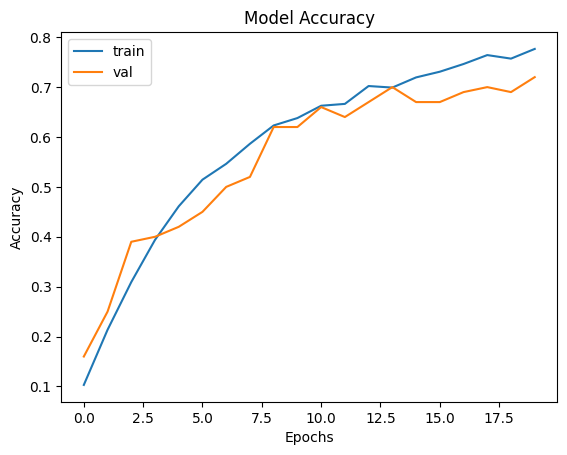

In [232]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

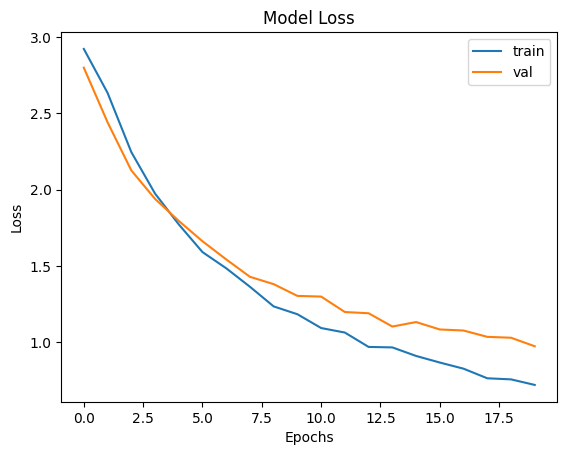

In [233]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [234]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have 'y_test' and 'y_pred' in the correct format
# If 'y_test' is one-hot encoded, convert 'y_pred' to one-hot encoding
# If 'y_test' is not one-hot encoded, make sure 'y_pred' is in the same format

# Assuming 'y_test' and 'y_pred' are your ground truth and predicted labels
# Convert one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.43      0.60      0.50         5
           2       0.67      0.80      0.73         5
           3       0.75      0.60      0.67         5
           4       0.80      0.80      0.80         5
           5       0.83      1.00      0.91         5
           6       0.83      1.00      0.91         5
           7       0.57      0.80      0.67         5
           8       1.00      1.00      1.00         5
           9       0.00      0.00      0.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      0.80      0.89         5
          13       0.67      0.80      0.73         5
          14       0.57      0.80      0.67         5
          15       0.57      0.80      0.67         5
          16       1.00      1.00      1.00         5
    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


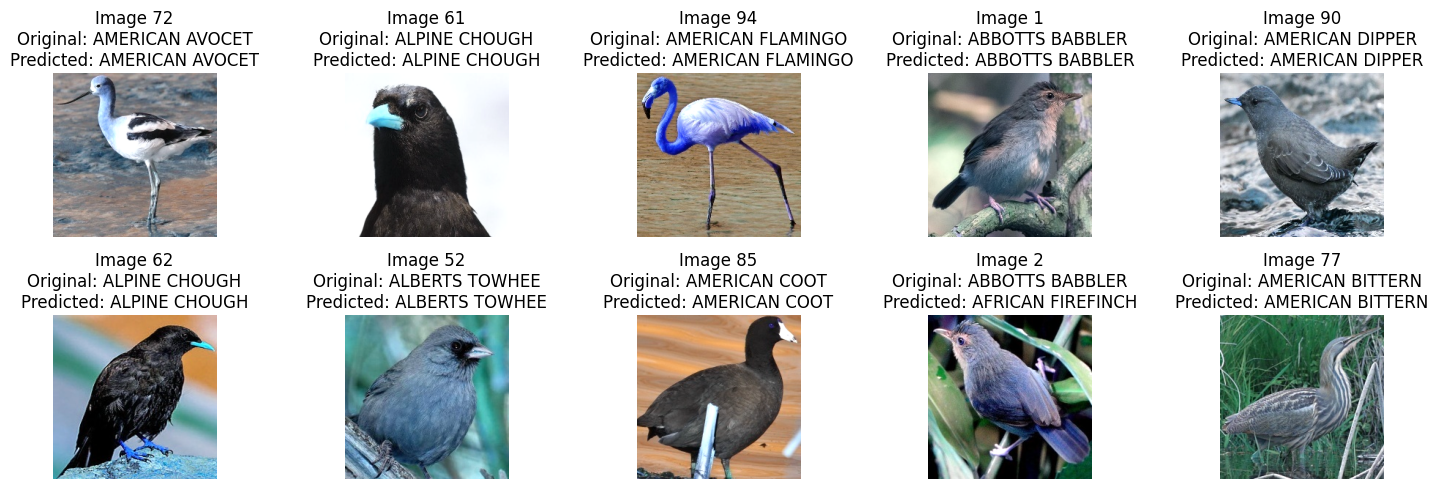

In [239]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 'x_test', 'y_test', and 'y_pred' loaded

# Function to print 10 random images and their labels
def print_random_images_with_labels():
    plt.figure(figsize=(15, 5))

    # Generate 10 random indices
    random_indices = np.random.choice(len(x_test), size=10, replace=False)

    for i, index in enumerate(random_indices):
        # Print original and predicted labels
        original_label = sorted(os.listdir(train_root_dir))[np.argmax(y_test[index])]
        predicted_label = sorted(os.listdir(train_root_dir))[np.argmax(y_pred[index])]

        # Plot the image with text above
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[index])
        plt.title(f"Image {index + 1}\nOriginal: {original_label}\nPredicted: {predicted_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Print 10 random images and labels
print_random_images_with_labels()


In [243]:
from keras.models import load_model

# Assuming 'model' is your trained model
model.save('final1.h5')
